In [1]:
import numpy as np
import pandas as pd

import os
import itertools

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.lines as mlines
import matplotlib.cm as cm
from matplotlib import gridspec

from io import StringIO

from astropy import units as u
from astropy.constants import k_B, h, c, m_p, m_e, eps0, e
from astropy.io.ascii import read

In [2]:
# Definimos las constantes en unidades del sistema cgs 

k_B = k_B.to(u.erg / u.K)
h = h.to(u.erg * u.s)
c = c.to(u.cm / u.s)
m_p = m_p.to(u.g)
m_e = m_e.to(u.g)
eps0 = eps0.to(u.F / u.cm)
e.to(u.erg / u.V)

<Quantity 1.60217663e-12 erg / V>

In [3]:
file_list = ['t5000.dat', 't8000.dat']
data_dic = {file.split('.')[0]: file for file in file_list} # Asignar a cada modelo su nombre sin el .dat

for file in file_list:
    
    modelo = file.split('.')[0]
    data_dic[modelo] = {} # diccionario vacío 

    with open(file, 'r') as file: # Abrir y leer cada archivo 
        lines = file.readlines() 
        
    d3 = lines[24:]
    d3 = ''.join(d3) # Unir todas las líneas en un string y separarlas por un espacio
    data_io = StringIO(d3) # Para trabajar con el string como si fuera un archivo corriente
    df = pd.read_csv(data_io, delim_whitespace=True) # comma separated values 
    df = df.iloc[:, 1:] # Data frame con todas las filas y los datos a partir de la segunda columna

    data_dic[modelo]['data'] = df
    
print(data_dic)

{'t5000': {'data':     lgTauR  lgTau5       Depth       T           Pe         Pg      Prad  \
0     -5.0 -4.6763 -50660000.0  3483.6     0.011273     439.63   0.83511   
1     -4.8 -4.4817 -48520000.0  3526.5     0.015271     582.88   0.83523   
2     -4.6 -4.2960 -46520000.0  3573.8     0.020571     755.90   0.83537   
3     -4.4 -4.1150 -44610000.0  3619.5     0.027259     967.50   0.83556   
4     -4.2 -3.9359 -42730000.0  3664.0     0.035740    1229.40   0.83580   
5     -4.0 -3.7571 -40870000.0  3707.6     0.046514    1556.10   0.83610   
6     -3.8 -3.5778 -39000000.0  3750.6     0.060223    1966.00   0.83650   
7     -3.6 -3.3975 -37110000.0  3793.0     0.077659    2482.40   0.83703   
8     -3.4 -3.2160 -35210000.0  3834.9     0.099819    3135.20   0.83774   
9     -3.2 -3.0333 -33270000.0  3875.7     0.127850    3963.30   0.83869   
10    -3.0 -2.8491 -31310000.0  3914.9     0.163070    5017.60   0.84000   
11    -2.9 -2.7567 -30330000.0  3934.9     0.184290    5648.90   0.84

/tmp/ipykernel_9154/2769201770.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(data_io, delim_whitespace=True) # comma separated values
/tmp/ipykernel_9154/2769201770.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(data_io, delim_whitespace=True) # comma separated values


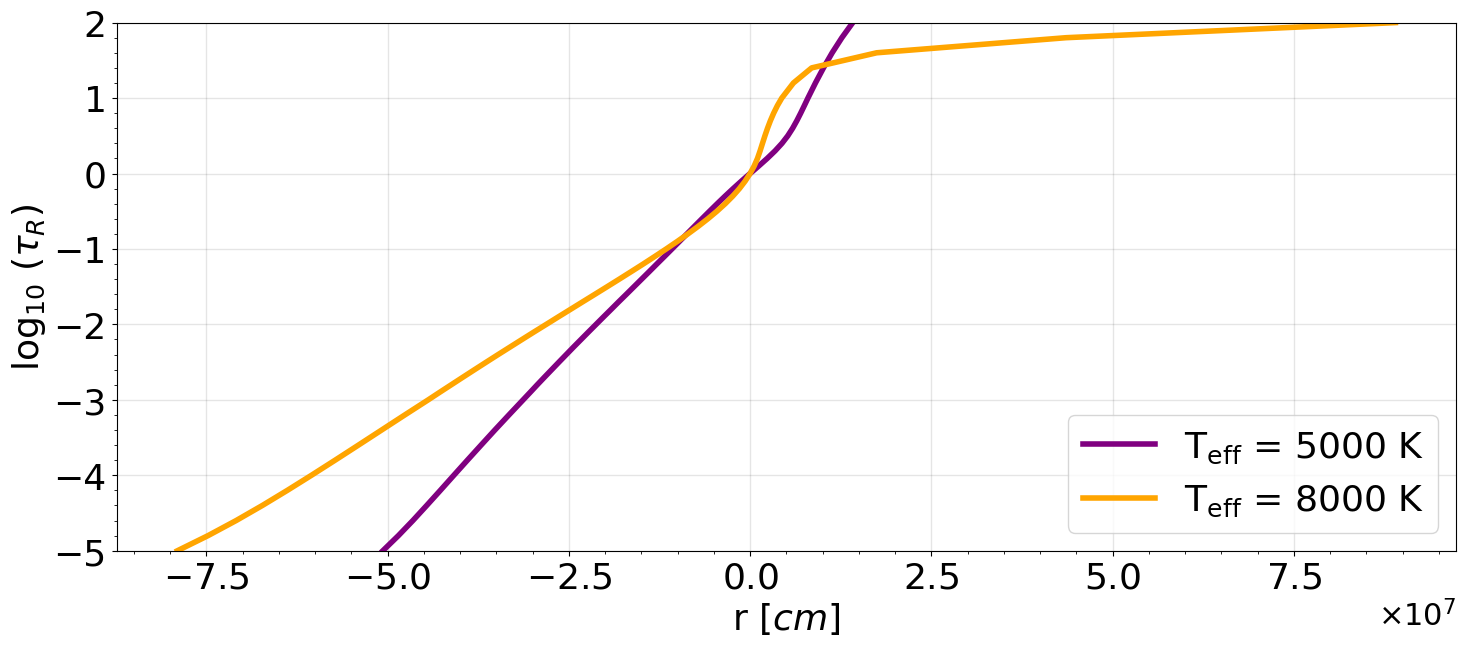

In [4]:
# lgtaur vs r plot

plt.figure(figsize = (14,6))
colors = ['purple', 'orange']

color_cycle = itertools.cycle(colors)

for i, modelo in enumerate(data_dic): # keys del diccionario (cada modelo)
    data = data_dic[modelo]['data']
    rr = data['Depth']
    log_taur = data['lgTauR']
    color = next(color_cycle)
    plt.plot(rr,log_taur, color = color, linewidth = 4, label = r'T$_{\text{eff}}$ = ' + str(modelo[1:]) + ' K')

plt.tight_layout()  # Adjust the layout to avoid clipping
plt.minorticks_on()
plt.legend(fontsize = 26, loc = 4)
t = plt.gca().xaxis.get_offset_text()
t.set_size(22)

plt.ylim(-5,2)
plt.tick_params(axis='both', which='major', labelsize=26) #para el tamaño de los ticks
plt.grid(linestyle = '-', color = 'black', alpha = 0.1, linewidth = 1, which = 'major')
plt.ylabel(r'log$_{10}$ ($\tau_R $)', fontsize = 26)
plt.xlabel(r'r $[cm]$', fontsize = 26)
plt.gca().xaxis.set_major_formatter(mpl.ticker.ScalarFormatter(useMathText=True))

plt.savefig('figures/r vs taur_def.pdf', format = 'pdf', bbox_inches='tight')

plt.show()

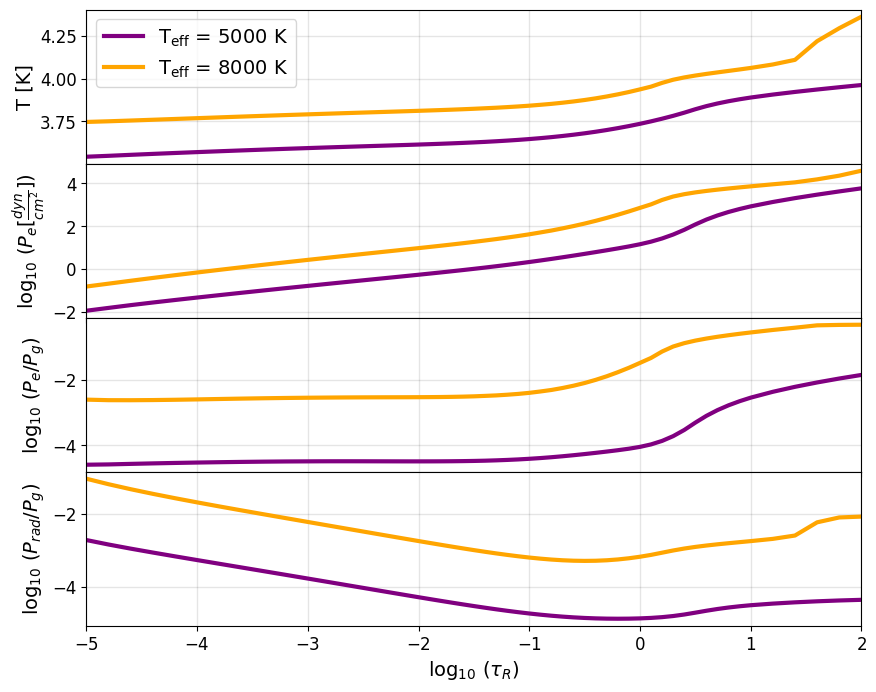

In [5]:
# Los demás plots

fig = plt.figure(figsize = (10,8))
gs = gridspec.GridSpec(4, 1) 

colors = ['purple', 'orange']
color_cycle = itertools.cycle(colors)

for i, modelo in enumerate(data_dic):
    data = data_dic[modelo]['data']
    log_taur = data['lgTauR']
    Pe = data['Pe']
    Pg = data['Pg']
    Prad = data['Prad']
    T = data['T']

    color = next(color_cycle)
    yys = [T,Pe,Pe/Pg,Prad/Pg]

    ax1 = plt.subplot(gs[0])
    line1, = ax1.plot(log_taur, np.log10(yys[0]), linewidth = 3, color = color, label = r'T$_{\text{eff}}$ = ' + str(modelo[1:]) + ' K')

    ax2 = plt.subplot(gs[1], sharex = ax1)
    line2, = ax2.plot(log_taur, np.log10(yys[1]), linewidth = 3, color = color) 
    
    ax3 = plt.subplot(gs[2], sharex = ax1)
    line3, = ax3.plot(log_taur, np.log10(yys[2]), linewidth = 3, color = color) 

    ax4 = plt.subplot(gs[3], sharex = ax1)
    line4, = ax4.plot(log_taur, np.log10(yys[3]), linewidth = 3, color = color) 

    yticks = ax1.yaxis.get_major_ticks()
    yticks = ax2.yaxis.get_major_ticks()
    yticks = ax3.yaxis.get_major_ticks()
    yticks = ax4.yaxis.get_major_ticks()

    plt.setp(ax1.get_xticklabels(), visible=False)
    plt.setp(ax2.get_xticklabels(), visible=False)
    plt.setp(ax3.get_xticklabels(), visible=False)

    plt.gca()
    plt.subplots_adjust(hspace=.0)


    ax1.set_xlim(-5,2)
    ax1.legend(fontsize = (14))
    
    ax1.tick_params(axis='y', which='both', labelsize=12) #para el tamaño de los ticks
    ax2.tick_params(axis='y', which='both', labelsize=12) #para el tamaño de los ticks
    ax3.tick_params(axis='y', which='both', labelsize=12) #para el tamaño de los ticks
    ax4.tick_params(axis='both', which='both', labelsize=12) #para el tamaño de los ticks

    ax1.grid(linestyle = '-', color = 'black', alpha = 0.1, linewidth = 1, which = 'major')
    ax2.grid(linestyle = '-', color = 'black', alpha = 0.1, linewidth = 1, which = 'major')
    ax3.grid(linestyle = '-', color = 'black', alpha = 0.1, linewidth = 1, which = 'major')
    ax4.grid(linestyle = '-', color = 'black', alpha = 0.1, linewidth = 1, which = 'major')
    
    ax4.set_xlabel(r'log$_{10}$ ($\tau_R$)', fontsize = 14)
    ax1.set_ylabel(r'T [K]', fontsize = 14)
    ax2.set_ylabel(r'log$_{10}$ ($P_e [\frac{dyn}{cm^{2}}]$)', fontsize = 14)
    ax3.set_ylabel(r'log$_{10}$ ($P_e / P_g$)', fontsize = 14)
    ax4.set_ylabel(r'log$_{10}$ ($P_{rad} / P_g $)', fontsize = 14)

    plt.gca().xaxis.set_major_formatter(mpl.ticker.ScalarFormatter(useMathText=True))
    
plt.savefig('figures/params vs taur_def.pdf', format = 'pdf', bbox_inches='tight')

plt.show()

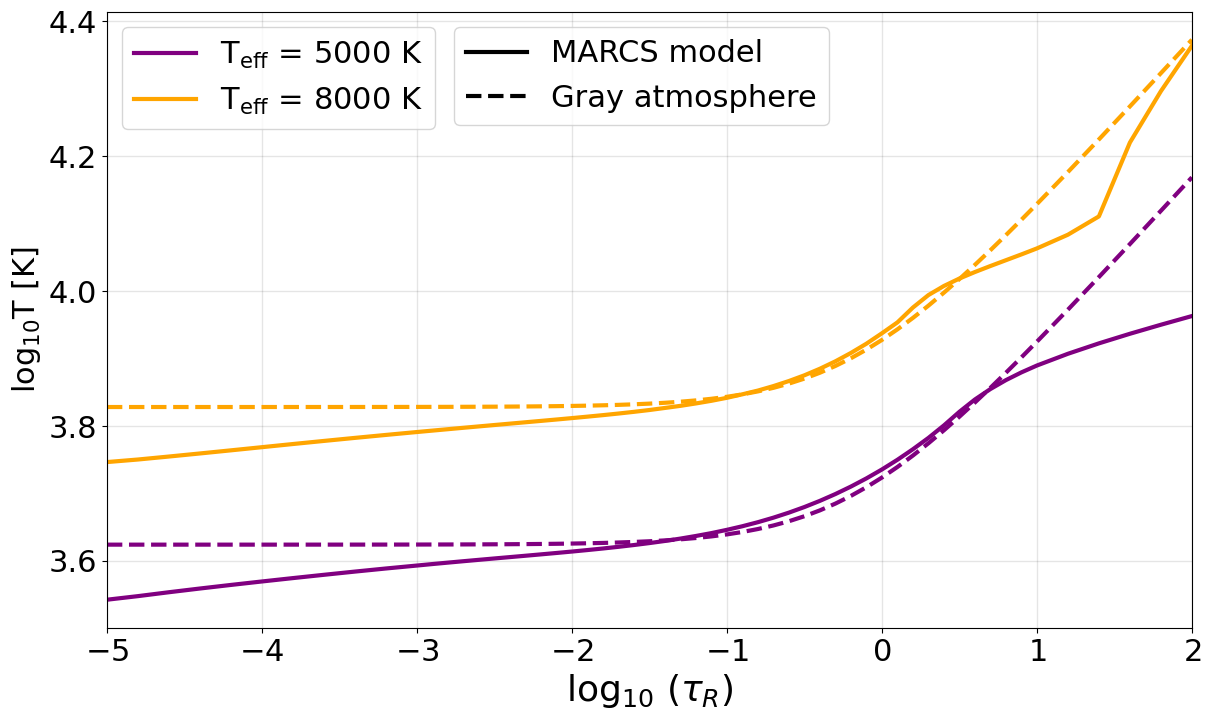

In [6]:
# Atmósfera gris vs perfil de temperatura

plt.figure(figsize = (14,8))
colors = ['purple', 'orange']
color_cycle = itertools.cycle(colors)

ff1, = plt.plot(np.NaN, np.NaN, 'k', linewidth = 3)
ff2, = plt.plot(np.NaN, np.NaN, '--', color = 'k', linewidth = 3)
plot_lines = []
plot_lines.append([ff1,ff2])
T_eff = [5000, 8000]

for i, modelo in enumerate(data_dic):
    data = data_dic[modelo]['data']
    log_taur = data['lgTauR']
    color = next(color_cycle)
    T = data['T']
    
    T_grey = ((3/4) * (T_eff[i] ** 4) * ((10 ** log_taur) + (2/3) ) )**(1/4)

    plt.plot (log_taur, np.log10(T), color = color, linewidth = 3,  label = r'T$_{\text{eff}}$ = ' + str(modelo[1:]) + ' K')
    plt.plot (log_taur, np.log10(T_grey), '--', color = color, linewidth = 3)

plt.tick_params(axis='both', which='major', labelsize=22) #para el tamaño de los ticks
plt.grid(linestyle = '-', color = 'black', alpha = 0.1, linewidth = 1, which = 'major')
plt.ylabel(r'log$_{10}$T [K]', fontsize = 22)
plt.xlabel(r'log$_{10}$ ($\tau_R$)', fontsize = 26)
plt.gca().xaxis.set_major_formatter(mpl.ticker.ScalarFormatter(useMathText=True))
plt.xlim(-5,2)

legend1 = plt.legend(plot_lines[0], ["MARCS model", "Gray atmosphere"], fontsize = 22, bbox_to_anchor = (0.68,1))
plt.legend(fontsize = 22)

plt.gca().add_artist(legend1)

plt.savefig('figures/grey atm_def.pdf', format = 'pdf', bbox_inches='tight')

In [7]:
atomic_data = {'HI': {}, 'HII': {}, 'H-': {}}

Us = [2, 1, 1]
gs = [[2, 8, 18], [], []]

wave_numbers_HI = [0,
                   82259.158 ,
                   97492.304 ,]
wave_number = [wave_numbers_HI, 
               [], 
               [],
               [],[],[]]

ion_en = [13.59844 * u.eV, 0 * u.eV, 0.755 * u.eV]

for i, el in enumerate(atomic_data.keys()):
    atomic_data[el]['U'] = Us[i]
    atomic_data[el]['g'] = gs[i]
    atomic_data[el]['wave_number'] = wave_number[i]
    atomic_data[el]['ex_en'] = [(h*c * wave_number[i][k]*u.cm**(-1)).to(u.eV) for k in range(len(wave_number[i]))]
    atomic_data[el]['ion_en'] = ion_en[i]


atomic_data_ext = {'HI': {}, 'HII': {}, 'H-': {}, 'HeI': {}, 'HeII': {}, 'HeIII': {}}

Us = [2, 1, 1, 1, 2, 1]
gs = [[2, 2, 4], [], [], [], [], []]

wave_numbers_HI = [0* u.cm**(-1),
                   82258.9543992821* u.cm**(-1),
                   1200000* u.cm**(-1)]

wave_number = [wave_numbers_HI, 
               [], 
               [],
               [],[],[]]

ion_en = [13.59844 * u.eV, 0 * u.eV, 0.755 * u.eV,
          24.58741 * u.eV, 54.41778 * u.eV, 0 * u.eV]

for i, el in enumerate(atomic_data_ext.keys()):
    atomic_data_ext[el]['U'] = Us[i]
    atomic_data_ext[el]['g'] = gs[i]
    atomic_data_ext[el]['wave_number'] = wave_number[i]
    atomic_data_ext[el]['ion_en'] = ion_en[i]

at = atomic_data
ate = atomic_data_ext

# Cálculo de abundancias

C = (2 * np.pi * m_e * k_B / (h**2))**(3/2)
C = C.to(u.K**(-3/2) * u.cm**(-3))

def saha(N_e, T, U_p, U_m, chi_lu):
    exp_fact = - (chi_lu / (k_B * T)).to(u.dimensionless_unscaled)
    exp = np.exp(exp_fact)
    fact1 = 2 * U_p / (N_e * U_m)
    result = fact1 * C * T**(3/2) * exp
    return result.to(u.dimensionless_unscaled)

def matrix_saha(a,b):
    arr = [[a, -1, 0],
           [-1, 0, b],
           [0, 1, -1]]
    return np.array(arr)

def boltzmann(gl, gu, chi_l, chi_u, T):
    rat_g = gu/gl
    exp_fact = (-(chi_u-chi_l)/(k_B*T)).to(u.dimensionless_unscaled)
    exp = np.exp(exp_fact)
    result = rat_g * exp
    return result.to(u.dimensionless_unscaled)

def matrix_boltz(a,b):
    arr = [[1, 1, 1],
           [a, -1, 0],
           [0, b, -1]]
    return np.array(arr)

M = len(data_dic['t8000']['data'])

stars = ['t5000', 't8000']
results = {star: {} for star in stars}

for key, temp in enumerate(stars): 
    data = data_dic[temp]['data']
    sols_saha = np.zeros((M, 3))
    sols_boltzman = np.zeros((M, 3))

    for i in range(M):
        P_e = np.array(data['Pe'])[i] * u.erg / u.cm**3
        T = np.array(data['T'])[i] * u.K

        N_e = P_e / (k_B * T) 
        a = saha(N_e, T, at['HII']['U'], at['HI']['U'], at['HI']['ion_en'])
        b = saha(N_e, T, at['HI']['U'], at['H-']['U'], at['H-']['ion_en'])
        matrix_saha_ = matrix_saha(a, b)
        rhs_saha = np.array([0,0,N_e.value])
        sols_saha_ = np.linalg.solve(matrix_saha_, rhs_saha)
        sols_saha[i, :] = sols_saha_

        alpha = boltzmann(at['HI']['g'][0], at['HI']['g'][1],
                             at['HI']['ex_en'][0], at['HI']['ex_en'][1], T)
        beta = boltzmann(at['HI']['g'][1], at['HI']['g'][2],
                            at['HI']['ex_en'][1], at['HI']['ex_en'][2], T)
        
        matrix_boltzman = matrix_boltz(alpha, beta)
        NHI = sols_saha_[0]
        rhs_boltzman = np.array([NHI,0,0])
        sols_boltzman_ = np.linalg.solve(matrix_boltzman, rhs_boltzman)
        sols_boltzman[i, :] = sols_boltzman_
    
    P_e = np.array(data['Pe'])
    T = np.array(data['T'])
    N_e = P_e / (k_B.value * T) 
    results[temp]['Ne'] = list(N_e)
    results[temp]['NHI'] = list(sols_saha[:, 0])
    results[temp]['NHII'] = list(sols_saha[:, 1])
    results[temp]['NH-'] = list(sols_saha[:, 2])
    results[temp]['NHI1'] = list(sols_boltzman[:, 0])
    results[temp]['NHI2'] = list(sols_boltzman[:, 1])
    results[temp]['NHI3'] = list(sols_boltzman[:, 2])

tauR_1 = 0.5
tauR_2 = 5.
tauR = 10**log_taur

id1 = np.argmin(np.abs(tauR - tauR_1))
id2 = np.argmin(np.abs(tauR - tauR_2))

temps = ['5000', '8000']
for temp in temps:
    for i, id in enumerate([id1, id2]):
        N_HI = results['t'+temp]['NHI']
        N_HII = results['t'+temp]['NHII']
        N_Hm = results['t'+temp]['NH-']
        N_HI1 = results['t'+temp]['NHI1']
        N_HI2 = results['t'+temp]['NHI2']
        N_HI3 = results['t'+temp]['NHI3']

        row =  f'{tauR[id]:.2f}: {(N_HI[id])} {(N_HII[id])} {(N_Hm[id])} {(N_HI1[id])} {(N_HI2[id])} {(N_HI3[id])} '
        print(row)

0.50: 7.300139658822932e+18 11046600741012.365 134753191725.47694 7.300139657265229e+18 1515236413.109706 42467210.9496626 
5.01: 2.7285158830351658e+17 323428310086437.56 51396343601.10496 2.7285150967161123e+17 71155480240.71242 7476425094.806273 
0.50: 1.5760036182736598e+16 226073295457183.7 1611924807.7501092 1.5760015315281172e+16 18327516563.4391 2539938862.266809 
5.01: 8372817122934518.0 3415005223871809.0 5826265036.725944 8371988712893187.0 636952474418.0342 191457566913.01736 


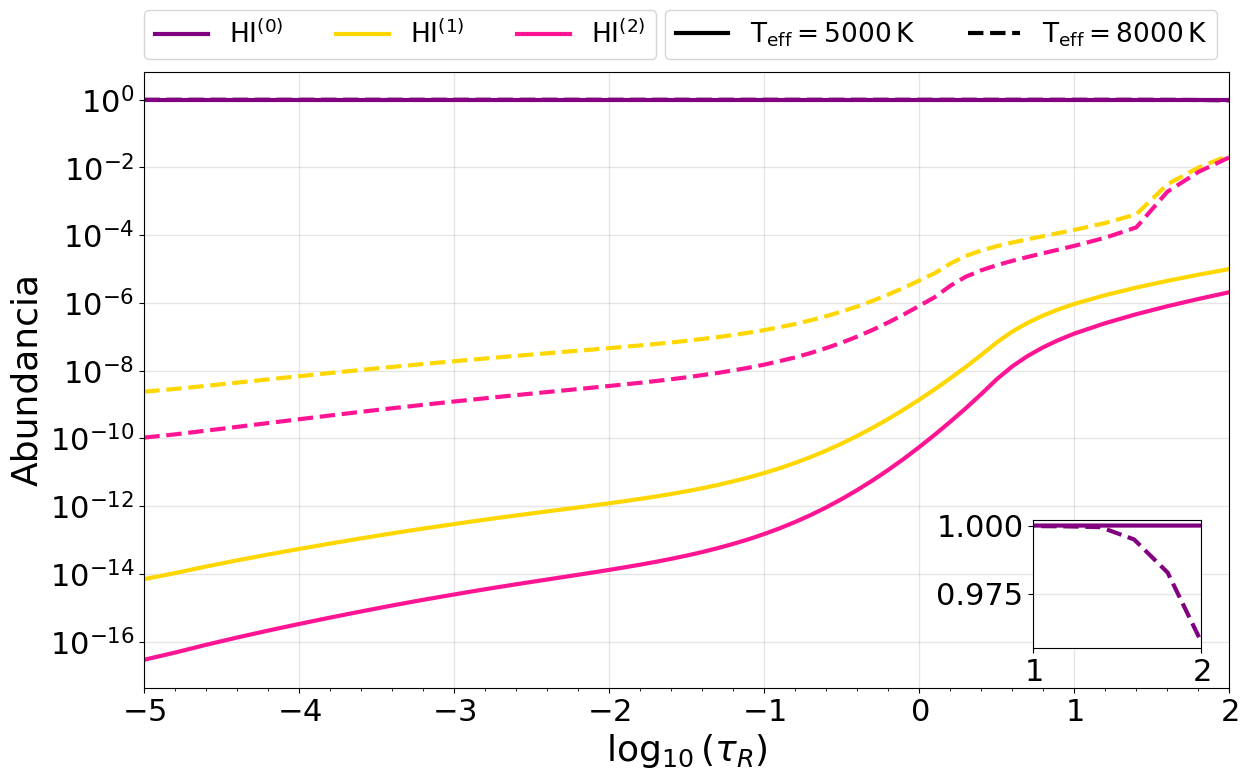

In [8]:
# Figura HI

fig, ax = plt.subplots(1,1,figsize = (14,8))
plt.grid(linestyle = '-', color = 'black', alpha = 0.1, linewidth = 1)
plt.gca().xaxis.set_major_formatter(mpl.ticker.ScalarFormatter(useMathText=True))

ax2 = fig.add_axes([0.76, 0.16, 0.12, 0.16])

log_taur = data['lgTauR']
lss = ['-','--']

colors = ['purple','gold','deeppink']
    
labels = [r'HI$^{(0)}$', r'HI$^{(1)}$', 'HI$^{(2)}$']
for i, temp in enumerate(['t5000', 't8000']): 
    N_HI = np.array(results[temp]['NHI'])
    N_HI1 = np.array(results[temp]['NHI1'])
    N_HI2 = np.array(results[temp]['NHI2'])
    N_HI3 = np.array(results[temp]['NHI3'])
    if i != 0:
        ax.plot(log_taur, N_HI1/N_HI, ls=lss[i], c=colors[0], lw = 3)
        ax2.plot(log_taur, N_HI1/N_HI, ls=lss[i], c=colors[0], lw = 3)
        ax.plot(log_taur, N_HI2/N_HI, ls=lss[i], c=colors[1], lw = 3)
        ax.plot(log_taur, N_HI3/N_HI, ls=lss[i], c=colors[2], lw = 3)
    else:
        ax.plot(log_taur, N_HI1/N_HI, ls=lss[i], c=colors[0], lw = 3, label = labels[0])
        ax2.plot(log_taur, N_HI1/N_HI, ls=lss[i], c=colors[0], lw = 3)
        ax.plot(log_taur, N_HI2/N_HI, ls=lss[i], c=colors[1], lw = 3, label = labels[1])
        ax.plot(log_taur, N_HI3/N_HI, ls=lss[i], c=colors[2], lw = 3, label = labels[2])

ax.set_xlabel(r'$\log_{10} (\tau_R)$', fontsize=26)
ax.set_ylabel(r'Abundancia', fontsize=26)
plt.grid(linestyle = '-', color = 'black', alpha = 0.1, linewidth = 1)
plt.gca().xaxis.set_major_formatter(mpl.ticker.ScalarFormatter(useMathText=True))
ax.set_xlim(np.min(log_taur), np.max(log_taur))
ax2.set_xlim(1, np.max(log_taur))
ax2.tick_params(axis='both', which='major', labelsize=22) #para el tamaño de los ticks
ax.tick_params(axis='both', which='major', labelsize=22) #para el tamaño de los ticks

legend1 = ax.legend(loc=(0.0,1.02), ncols = 6, fontsize = 19)
ax.set_yscale('log')

handles2 = []
labels_2 = [r'T$_{\text{eff}}=5000 \, \text{K}$', r'T$_{\text{eff}}=8000 \, \text{K}$']
for i in range(2):
    handles2.append(mlines.Line2D([], [], color='k', linestyle=lss[i], lw = 3, label=labels_2[i]))
legend2 = ax.legend(handles=handles2, loc=(0.48,1.02), ncols=2, fontsize = 19)
ax.add_artist(legend1)
ax.minorticks_on()
plt.savefig('figures/HI_abundances.pdf', bbox_inches='tight')
plt.show() 

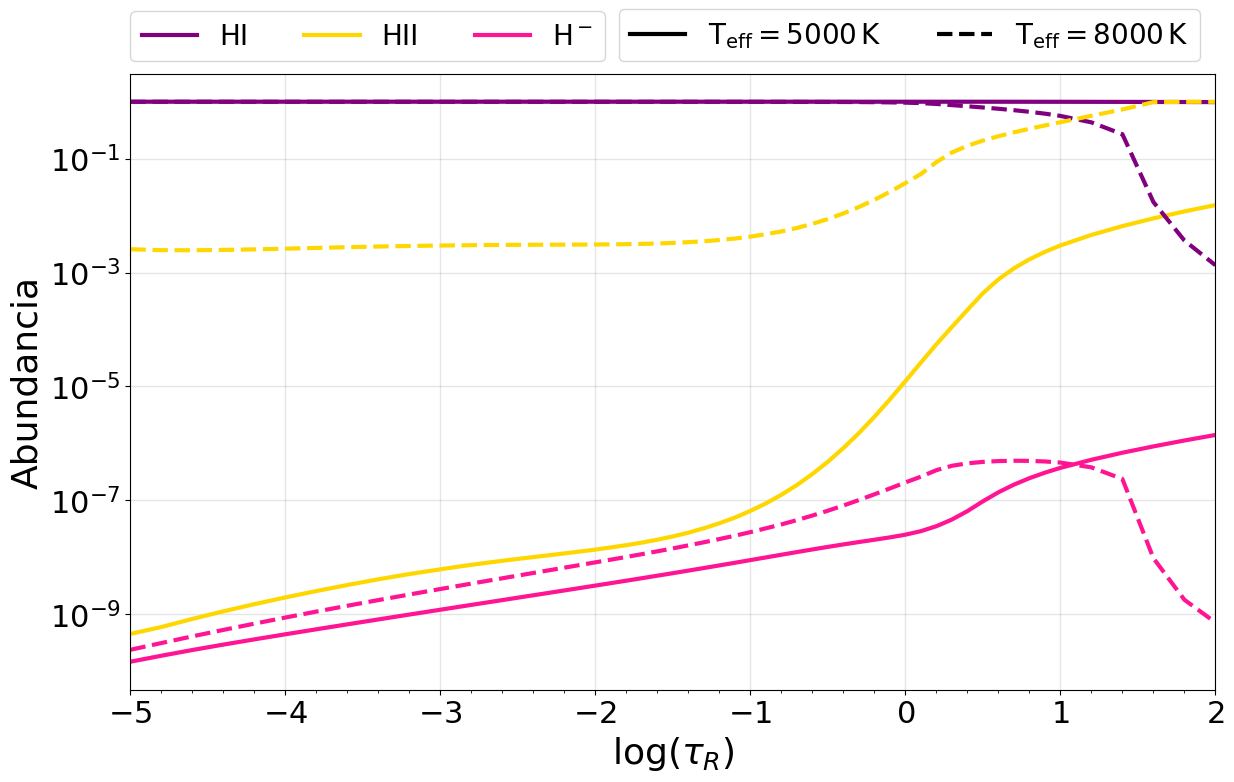

In [9]:
fig, ax = plt.subplots(1,1,figsize = (14,8))
plt.grid(linestyle = '-', color = 'black', alpha = 0.1, linewidth = 1)
plt.gca().xaxis.set_major_formatter(mpl.ticker.ScalarFormatter(useMathText=True))
log_taur = data['lgTauR']
lss = ['-','--']

colors = ['purple','gold','deeppink']

labels = ['HI', 'HII', r'H$^-$']
for i, temp in enumerate(['t5000', 't8000']): 
    N_HI = np.array(results[temp]['NHI'])
    N_HII = np.array(results[temp]['NHII'])
    N_Hm = np.array(results[temp]['NH-'])
    N_H = N_HI + N_HII + N_Hm
    if i == 0:
        ax.plot(log_taur, N_HI/N_H, ls=lss[i], c=colors[0], lw = 3,label = labels[0])
        ax.plot(log_taur, N_HII/N_H, ls=lss[i], c=colors[1], lw = 3,label = labels[1])
        ax.plot(log_taur, N_Hm/N_H, ls=lss[i], c=colors[2], lw = 3,label = labels[2])

    else:
        ax.plot(log_taur, N_HI/N_H, ls=lss[i], c=colors[0], lw = 3)
        ax.plot(log_taur, N_HII/N_H, ls=lss[i], c=colors[1], lw = 3)
        ax.plot(log_taur, N_Hm/N_H, ls=lss[i], c=colors[2], lw = 3)

ax.set_xlabel(r'$\log (\tau_R)$', fontsize=26)
ax.set_ylabel(r'Abundancia', fontsize=26)
plt.grid(linestyle = '-', color = 'black', alpha = 0.1, linewidth = 1)
plt.gca().xaxis.set_major_formatter(mpl.ticker.ScalarFormatter(useMathText=True))
ax.set_xlim(np.min(log_taur), np.max(log_taur))
ax.tick_params(axis='both', which='major', labelsize=22) #para el tamaño de los ticks

legend1 = ax.legend(loc=(0.0,1.02), ncols = 6, fontsize = 20)
ax.set_yscale('log')

handles2 = []
labels_2 = [r'T$_{\text{eff}}=5000 \, \text{K}$', r'T$_{\text{eff}}=8000 \, \text{K}$']
for i in range(2):
    handles2.append(mlines.Line2D([], [], color='k', linewidth = 3, linestyle=lss[i], label=labels_2[i]))
legend2 = ax.legend(handles=handles2, loc=(0.45,1.02), ncols=2, fontsize = 20)
ax.add_artist(legend1)
ax.minorticks_on()
plt.savefig('figures/H_ions.pdf', format = 'pdf', bbox_inches='tight')
plt.show() 

In [10]:
# Opacidad del continuo

R = 1.0968e5 * u.cm**(-1)

# Dispersión de electrones

def sigma_es():
    fact1 = 8 * np.pi / 3
    fact2 = (e.esu.value)**2 / (m_e.value * c.value**2)
    result = fact1 * fact2**2
    return result 

def kappa_es(N_e):
    return sigma_es() * N_e

# libre - libre

def HI_sigma_ff(lamb, T):

    cte1 = 3.7e8
    Z = 1
    nu = c.value / lamb

    fact1 = cte1 * Z**2 
    fact2 = T**(1/2) * nu**3

    f1 = 0.3456
    f2 = lamb * k_B.value * T / (h.value * c.value)
    f3 = 1/2
    f4 = (lamb*R.value)**(-1/3)

    gaunt = 1 + f1*f4*(f2+f3)
    
    return gaunt * fact1 / fact2


def HI_kappa_ff(lamb, T, NHII, Ne):
    return NHII * Ne * HI_sigma_ff(lamb, T)

# HI ligado - libre

def HI_sigma_bf(lamb, n=1):
    
    lamb_0 = (R.value/n**2)**(-1)


    lamb = lamb
    nu = c.value/lamb

    cte1 = 2.815e29 
    cte2 = 0.3456
    Z=1

    g_bf = 1 - cte2 * (lamb*R.value)**(-1/3) * (lamb*R.value / (n**2) - 1/2)
    sigma_bf = cte1 * Z**4 * g_bf / (n**5 * nu**3)
    sigma_bf = sigma_bf

    sigma_bf = np.where(lamb > lamb_0, 0, sigma_bf)

    return sigma_bf

def HI_kappa_bf(lamb, NHI, n=1):
    return NHI * HI_sigma_bf(lamb, n)

# H- ligado - libre

a_coefs = [1.99654, -1.18267e-5, 2.64243e-6, -4.40524e-10, 3.23992e-14, -1.39568e-18,
           2.78701e-23]

def Hm_sigma_bf(lamb):
    lamb = lamb  * 10**8 # Unidades correctas

    # Para el polinomio utilizamos polyval
    result = np.polyval(a_coefs[::-1], lamb)

    return result * 10**-18

def Hm_kappa_bf(lamb, NHm):
    return NHm * Hm_sigma_bf(lamb)


# H- libre - libre 

f0cs = [-2.2763, -1.6850, 0.76661, -0.053346]
f1cs = [15.2827, -9.2846, 1.99381, -0.142632]
f2cs = [-197.789, 190.266, -67.9775, 10.6913, -0.625151]
fcs = [f0cs, f1cs, f2cs]

def Hm_sigma_ff(lamb, T):
    lamb = lamb * 10**8

    fs = [np.polyval(fc[::-1], np.log10(lamb)) for fc in fcs]

    theta = 5040 / T
    exponent = -26 + np.polyval(fs[::-1], np.log10(theta))

    result = 10**exponent
    return result


def Hm_kappa_ff(lamb, T, Pe, NHI):
    return Pe * Hm_sigma_ff(lamb, T) * NHI

lambdas = np.array([n**2 / R.value for n in [1,2,3]])
d_lamb = 1e-8
lambdas_pm = [[lamb-d_lamb, lamb+d_lamb] for lamb in lambdas]
lambdas_pm = [item for sublist in lambdas_pm for item in sublist]
lambdas_pm = np.array(lambdas_pm)

def str_tb(arr):
    lis = list(arr)
    lis = [sl(i) for i in lis]
    stri = ' & '.join(lis)
    return stri

tauR_1 = 1
tauR = 10**log_taur
id1 = np.argmin(np.abs(tauR - tauR_1))

row_names = ['kappa_es = ', 
             'kappa_ff (H-) = ', 
             'kappa_ff (HI) = ',
             'kappa_bf (H-) = ',
             'kappa_bf HI(1) = ',
             'kappa_bf HI(2) = ',
             'kappa_bf HI(3) = ',
             'kappa_bf HI = ',]

temps = ['5000', '8000']

for temp in temps:
    vals = results['t'+temp]
    data = data_dic['t'+temp]['data']

    Pe = data['Pe'][id1]
    T = data['T'][id1]
    NHI = vals['NHI'][id1]
    NHII = vals['NHII'][id1]
    NHm = vals['NH-'][id1]
    NHI1 = vals['NHI1'][id1]
    NHI2 = vals['NHI2'][id1]
    NHI3 = vals['NHI3'][id1]
    Ne =  vals['Ne'][id1]

    k_es = np.array([kappa_es(Ne)]*len(lambdas_pm))

    k_ff_Hm = Hm_kappa_ff(lambdas_pm, T, Pe,  Ne)
    k_ff_HI = HI_kappa_ff(lambdas_pm, T, NHII, Ne)

    k_bf_Hm = Hm_kappa_bf(lambdas_pm, NHm)
    k_bf_HI1 = HI_kappa_bf(lambdas_pm, NHI1, n=1)
    k_bf_HI2 = HI_kappa_bf(lambdas_pm, NHI2, n=2)
    k_bf_HI3 = HI_kappa_bf(lambdas_pm, NHI3, n=3)
    k_bf_HI = k_bf_HI1 + k_bf_HI2 + k_bf_HI3

    kappas = [k_es, k_ff_Hm, k_ff_HI, k_bf_Hm, k_bf_HI1, k_bf_HI2, k_bf_HI3, k_bf_HI]

    for i, rn in enumerate(row_names):
        row = f'{rn} {(kappas[i])}'
        print(row)

# Para los plots de opacidad total 

stars = ['t5000', 't8000']
M = 1000
lambdas = np.linspace(800, 20000, M)*u.AA
lambdas = lambdas.to(u.cm).value

arrays = {}
for star in stars:
    arrays[star] = {
        'Pe': np.array(data_dic[star]['data']['Pe']),
        'T': np.array(data_dic[star]['data']['T']),
        'NHI': np.array(results[star]['NHI']),
        'NHII': np.array(results[star]['NHII']),
        'NHI1': np.array(results[star]['NHI1']),
        'NHI2': np.array(results[star]['NHI2']),
        'NHI3': np.array(results[star]['NHI3']),
        'NHm': np.array(results[star]['NH-']),
        'Ne': np.array(results[star]['Ne'])
    }

for star in stars:
    keys = list(arrays[star].keys()) 
    for key in keys:
        arrays[star][f"A{key}"], arrays[star][f"AL"] = np.meshgrid(arrays[star][key], lambdas)

for star in stars:
    arrays[star]['kappa_es'] = kappa_es(arrays[star]['ANe'])
    arrays[star]['HI_kappa_ff'] = HI_kappa_ff(arrays[star]['AL'], arrays[star]['AT'], arrays[star]['ANHII'], arrays[star]['ANe'])

    arrays[star]['HI_kappa_bf'] = sum([HI_kappa_bf(arrays[star]['AL'], arrays[star][f'ANHI{n}'], n=n) for n in range(1, 4)])
    arrays[star]['Hm_kappa_ff'] = Hm_kappa_ff(arrays[star]['AL'], arrays[star]['AT'], arrays[star]['APe'], arrays[star]['ANHI'])
    arrays[star]['Hm_kappa_bf'] = Hm_kappa_bf(arrays[star]['AL'], arrays[star]['ANHm'])

kappa_es =  [1.27691006e-11 1.27691006e-11 1.27691006e-11 1.27691006e-11
 1.27691006e-11 1.27691006e-11]
kappa_ff (H-) =  [2.86843823e-14 2.87786482e-14 2.77933377e-13 2.78202128e-13
 1.21612795e-12 1.21668281e-12]
kappa_ff (HI) =  [6.15446916e-14 6.19453439e-14 3.79561322e-12 3.80183307e-12
 4.30915462e-11 4.31231278e-11]
kappa_bf (H-) =  [1.49371940e-07 1.49665687e-07 7.96677763e-07 7.97206613e-07
 1.54160929e-06 1.54165218e-06]
kappa_bf HI(1) =  [10.1480958  0.         0.         0.         0.         0.       ]
kappa_bf HI(2) =  [5.81014096e-10 5.84714220e-10 3.05752771e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
kappa_bf HI(3) =  [3.18648764e-12 3.20701044e-12 1.82388215e-10 1.82678549e-10
 1.88300761e-09 0.00000000e+00]
kappa_bf HI =  [1.01480958e+01 5.87921231e-10 3.07576653e-08 1.82678549e-10
 1.88300761e-09 0.00000000e+00]
kappa_es =  [4.01905534e-10 4.01905534e-10 4.01905534e-10 4.01905534e-10
 4.01905534e-10 4.01905534e-10]
kappa_ff (H-) =  [1.94468553e-11 1.95306815e

In [11]:
# Opacidad de líneas

gs = [2, 8, 18]

wavelengths = [1215.67, 1025.72, 6562.74]
fs = [0.4162, 0.07910, 0.6407]
As = [4.699e8, 5.575e7, 4.410e7]
lines = ['L_alpha', 'L_beta', 'H_alpha']

line_dic = {}
for i, line in enumerate(lines):
    line_dic[line] = {'wavelength': wavelengths[i], 'f': fs[i]}
    line_dic[line]['A'] = As[i]

    sigma = np.pi * e.esu.value**2 / (m_p.value * c.value) * fs[i]
    line_dic[line]['sigma'] = sigma

line_dic['L_alpha']['damp'] = 4*np.pi * As[0]
line_dic['L_beta']['damp'] = 4*np.pi * (As[1] + As[0])
line_dic['H_alpha']['damp'] = 4*np.pi * (As[2])

stars = ['t5000', 't8000']

tauR_1 = 1
tauR = 10**log_taur
id1 = np.argmin(np.abs(tauR - tauR_1))


temps = ['5000', '8000']
dic_kappas = {temp: {} for temp in temps}

for temp in temps:
    vals = results['t'+temp]
    NHI1 = vals['NHI1'][id1]
    NHI2 = vals['NHI2'][id1]
    NHI3 = vals['NHI3'][id1]
    NS = [NHI1, NHI2, NHI3]
    
    nl, nu = 1, 2 
    kappa_La = line_dic['L_alpha']['sigma'] * (NS[nl-1] - (gs[nl-1]/gs[nu-1])*NS[nu-1])
    dic_kappas[temp]['kappa_La'] = kappa_La

    nl, nu = 1, 3
    kappa_Lb = line_dic['L_beta']['sigma'] * (NS[nl-1] - (gs[nl-1]/gs[nu-1])*NS[nu-1])
    dic_kappas[temp]['kappa_Lb'] = kappa_Lb

    nl, nu = 2, 3
    kappa_Ha = line_dic['H_alpha']['sigma'] * (NS[nl-1] - (gs[nl-1]/gs[nu-1])*NS[nu-1])
    dic_kappas[temp]['kappa_Ha'] = kappa_Ha

for temp in temps:
    row = f'{temp} : {dic_kappas[temp]["kappa_La"]},  {dic_kappas[temp]["kappa_Lb"]},  {dic_kappas[temp]["kappa_Ha"]} '
    print(row)

5000 : 9347589878887.78,  1776536183741.9087,  19722.9844867841 
8000 : 93892446993.72987,  17844546878.975765,  611388.7084135413 


/tmp/ipykernel_9154/3494768751.py:38: RuntimeWarning: invalid value encountered in log10
  ax.plot(lambdas*1e8, np.log10(arr1d), label=row_names[j], lw=3, color=cs[j])
/tmp/ipykernel_9154/3494768751.py:38: RuntimeWarning: divide by zero encountered in log10
  ax.plot(lambdas*1e8, np.log10(arr1d), label=row_names[j], lw=3, color=cs[j])


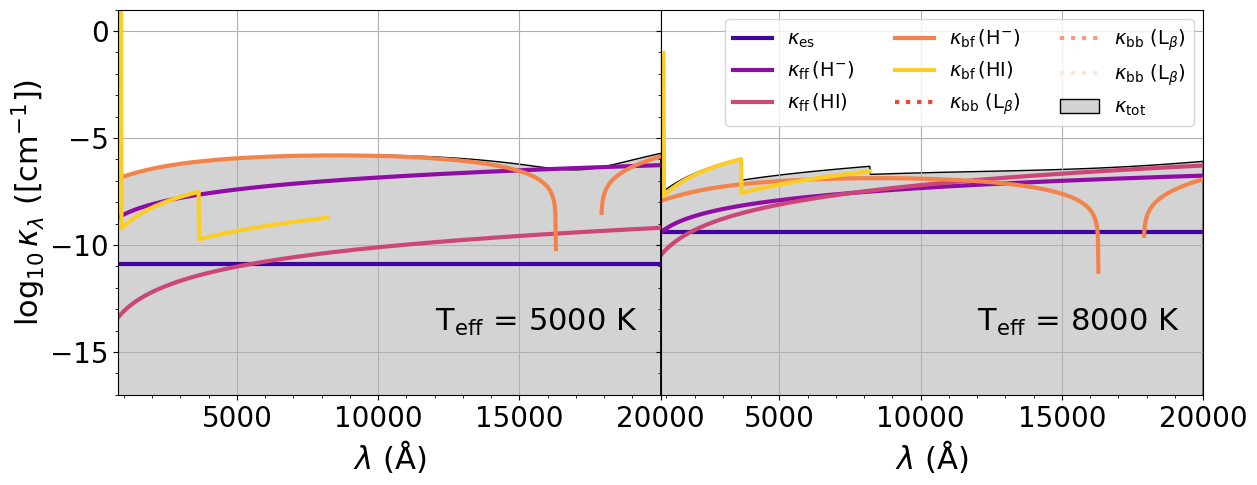

In [12]:
# Opacidad total

def lorentzian(lamb, lamb0, gamma):
    fact1 = np.pi * e.value**2 / (m_p.value * c.value)
    c_a = c.to(u.AA / u.s).value
    
    nu = c_a / lamb
    omega = 2*np.pi * nu

    nu_0 = c_a / lamb0
    omega_0 = 2*np.pi * nu_0

    return fact1 * gamma / ((omega - omega_0)**2 + (gamma/2)**2)

tauR_1 = 1
tauR = 10**log_taur
id1 = np.argmin(np.abs(tauR - tauR_1))
cmap = mpl.colormaps['plasma']
cs = [cmap(i) for i in np.linspace(0.1, 0.9, 5)]

row_names = [r'$\kappa_{\rm es}$', 
             r'$\kappa_{\rm ff} \, ({\rm H^{-}})$ ', 
             r'$\kappa_{\rm ff}\, ({\rm HI})$',
             r'$\kappa_{\rm bf}\, ({\rm H^{-}})$',
             r'$\kappa_{\rm bf}\, ({\rm HI})$']

kappas = ['kappa_es', 'Hm_kappa_ff', 'HI_kappa_ff', 'Hm_kappa_bf', 'HI_kappa_bf']

fig, axs = plt.subplots(1,2, figsize = (14,5))

for i, S in enumerate(stars):
    ax = axs[i]
    kappa_tot = np.zeros(len(lambdas))
    for j, kappa in enumerate(kappas):
        array = arrays[S][kappa]
        arr1d = array[:, id1]
        kappa_tot += arr1d
        ax.plot(lambdas*1e8, np.log10(arr1d), label=row_names[j], lw=3, color=cs[j])

    NS = ['NHI1', 'NHI2', 'NHI3']
    NS_ = [results[S][n][id1] for n in NS]
    nums = [(1,2), (1,3), (2,3)]

    names = [r'$\kappa_{\rm bb}$ (L$_\alpha)$', r'$\kappa_{\rm bb}$ (L$_\beta)$', r'$\kappa_{\rm bb}$ (H$_\alpha$)']
    cmap = mpl.colormaps['Reds_r']
    cs_ = [cmap(i) for i in np.linspace(0.4, 0.9, 3)]
    for j, line in enumerate(lines):
        wl = line_dic[line]['wavelength']
        lor = lorentzian(lambdas*1e8, wl, line_dic[line]['damp'])
        nl, nu = nums[j]
        kappa_bb = lor *  (NS_[nl-1] - (gs[nl-1]/gs[nu-1])*NS_[nu-1])
        ax.plot(lambdas*1e8, np.log10(kappa_bb), label=names[i],lw = 3, ls = ':',color = cs_[j])
        kappa_tot += kappa_bb

    ax.fill_between(lambdas*1e8, np.log10(kappa_tot), -100, label=r'$\kappa_{\rm tot}$', color='lightgray',edgecolor = 'k')
    ax.set_ylim(-17, 1)
    ax.set_xlim(lambdas[0]*1e8, lambdas[-1]*1e8)
    ax.grid()
    if i == 1: 
        ax.legend(fontsize=14, ncol=3, loc='upper right')
    
    ax.set_xlabel(r'$\lambda \ ({\rm \AA})$', fontsize = 22)
    ax.minorticks_on()
    
plt.subplots_adjust(wspace=.0)
axs[0].set_ylabel(r'$\log_{10}\kappa_{\lambda} \ ([{\rm cm}^{-1}])$',labelpad = 1, fontsize = 22)
axs[1].tick_params(axis='y', which='both', bottom=False,  top=False, labelbottom = False,  labelleft = False, labelsize = 20)
axs[1].tick_params(axis='both', which='major', labelsize=20)

axs[0].text(12000, -14,r'T$_{\text{eff}}$ = 5000 K', fontsize = 22)
axs[1].text(12000, -14,r'T$_{\text{eff}}$ = 8000 K', fontsize = 22)
axs[0].tick_params(axis='both', which='major', labelsize=20) #para el tamaño de los ticks

plt.savefig('figures/Opacity_tau1.pdf', bbox_inches='tight')
plt.show()